In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
areas = pd.read_csv(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final\areas_final.csv", header=None)
pacientes = pd.read_csv(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final\pacientes_final.csv", header=None)
tratamientos = pd.read_csv(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final\tratamientos_final.csv", header=None)
atenciones = pd.read_csv(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final\atenciones_final.csv", header=None)

# 2. Renombrar columnas y eliminar datos extra
areas.columns = ['area_id', 'area_name']
pacientes.columns = ['patient_id', 'patient_name', 'age', 'gender', 'registration_date']
# En tratamientos, la tercera columna es en realidad el area_id del tratamiento
tratamientos.columns = ['treatment_id', 'treatment_name', 'area_id', 'price']
atenciones.columns = ['attention_id', 'patient_id', 'treatment_id', 'attention_date', 'payment_type', 'status', 'extra']
atenciones.drop(columns=['extra'], inplace=True)

# 3. Exploración inicial
print("=== FORMAS DE LOS DATOS ===")
print(f"Áreas: {areas.shape}")
print(f"Pacientes: {pacientes.shape}")
print(f"Tratamientos: {tratamientos.shape}")
print(f"Atenciones: {atenciones.shape}\n")

print("=== PRIMERAS FILAS ===")
display(areas.head())
display(pacientes.head())
display(tratamientos.head())
display(atenciones.head())

# 4. Estadísticas numéricas
print("=== ESTADÍSTICAS NUMÉRICAS ===")
display(areas.describe(include=[np.number]))
display(pacientes.describe(include=[np.number]))
display(tratamientos.describe(include=[np.number]))
display(atenciones.describe(include=[np.number]))

print("=== VALORES NULOS ===")
for df, name in [(areas, 'Áreas'), (pacientes, 'Pacientes'), (tratamientos, 'Tratamientos'), (atenciones, 'Atenciones')]:
    print(f"--- {name} ---")
    display(df.isnull().sum())

# 6. Distribución de variables categóricas
print("=== DISTRIBUCIÓN DE CATEGÓRICAS ===")
for df, name in [(areas, 'Áreas'), (pacientes, 'Pacientes'), (tratamientos, 'Tratamientos'), (atenciones, 'Atenciones')]:
    print(f"--- {name} ---")
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f"{col}:")
        display(df[col].value_counts(dropna=False))

# 7. Unión de tablas (usando el field area_id en tratamientos)
merged = (
    atenciones
    .merge(pacientes, on='patient_id', how='left')
    .merge(tratamientos, on='treatment_id', how='left')
    .merge(areas, on='area_id', how='left')
)
print(f"\nDataset combinado: {merged.shape}")

# 8. Análisis final
print("=== Atenciones por Área ===")    
display(merged['area_name'].value_counts())

print("=== Atenciones por Tratamiento ===")
display(merged['treatment_name'].value_counts())

print("=== Estadísticas de Edad de Pacientes ===")
display(merged['age'].describe())

print("=== Pivot: Atenciones por Área y Tratamiento ===")
pivot = pd.pivot_table(
    merged,
    index='area_name',
    columns='treatment_name',
    values='attention_id',
    aggfunc='count',
    fill_value=0
)
display(pivot)





=== FORMAS DE LOS DATOS ===
Áreas: (7, 2)
Pacientes: (500, 5)
Tratamientos: (19, 4)
Atenciones: (1930, 6)

=== PRIMERAS FILAS ===


,area_id,area_name
0,7,Cirugía Oral
1,3,Endodoncia
2,1,Odontología General
3,5,Odontopediatría
4,2,Ortodoncia


,patient_id,patient_name,age,gender,registration_date
0,1,Eladio de Ramón,46,Otro,2024-11-03
1,2,Cándida Duque Miranda,17,F,2024-05-20
2,3,Vicenta Lasa Echevarría,40,F,2023-05-30
3,4,Goyo Felix Chacón Arregui,73,Otro,2023-08-20
4,5,Trinidad Juliá Fernandez,46,F,2024-08-07


,treatment_id,treatment_name,area_id,price
0,1,Consulta General,1,60.0
1,2,Limpieza Dental,1,180.0
2,3,Tratamiento de Caries,1,200.0
3,4,Colocación de Brackets,2,3000.0
4,5,Mantenimiento de Ortodoncia,2,200.0


,attention_id,patient_id,treatment_id,attention_date,payment_type,status
0,1,451,4,2021-01-09,Efectivo,Pagado
1,2,42,4,2021-01-20,Tarjeta,Pagado
2,3,51,4,2021-01-31,Efectivo,Pagado
3,4,59,14,2021-01-15,Efectivo,Pagado
4,5,35,14,2021-01-31,Efectivo,Pagado


=== ESTADÍSTICAS NUMÉRICAS ===


,area_id
count,7.000000
mean,4.000000
std,2.160247
min,1.000000
25%,2.500000
50%,4.000000
75%,5.500000
max,7.000000


,patient_id,age
count,500.000000,500.000000
mean,250.500000,41.306000
std,144.481833,20.826614
min,1.000000,5.000000
25%,125.750000,24.000000
50%,250.500000,41.000000
75%,375.250000,58.000000
max,500.000000,79.000000


,treatment_id,area_id,price
count,19.000000,19.000000,19.000000
mean,10.000000,4.210526,549.473684
std,5.627314,2.043389,778.277826
min,1.000000,1.000000,20.000000
25%,5.500000,2.500000,165.000000
50%,10.000000,5.000000,200.000000
75%,14.500000,6.000000,550.000000
max,19.000000,7.000000,3000.000000


,attention_id,patient_id,treatment_id
count,1930.000000,1930.000000,1930.000000
mean,965.500000,250.625389,10.013990
std,557.287329,146.540812,5.231233
min,1.000000,1.000000,1.000000
25%,483.250000,120.000000,5.000000
50%,965.500000,252.000000,11.000000
75%,1447.750000,380.750000,14.000000
max,1930.000000,500.000000,19.000000


=== VALORES NULOS ===
--- Áreas ---


area_id      0
area_name    0
dtype: int64

--- Pacientes ---


patient_id           0
patient_name         0
age                  0
gender               0
registration_date    0
dtype: int64

--- Tratamientos ---


treatment_id      0
treatment_name    0
area_id           0
price             0
dtype: int64

--- Atenciones ---


attention_id      0
patient_id        0
treatment_id      0
attention_date    0
payment_type      0
status            0
dtype: int64

=== DISTRIBUCIÓN DE CATEGÓRICAS ===
--- Áreas ---
area_name:


area_name
Cirugía Oral           1
Endodoncia             1
Odontología General    1
Odontopediatría        1
Ortodoncia             1
Periodoncia            1
Prostodoncia           1
Name: count, dtype: int64

--- Pacientes ---
patient_name:


patient_name
Arturo Jenaro Mateos Cazorla    1
Eladio de Ramón                 1
Cándida Duque Miranda           1
Vicenta Lasa Echevarría         1
Nilda Benitez Cabo              1
                               ..
Roberto Amorós Gibert           1
Leandro Escudero Grande         1
Marciano Cadenas Carro          1
Nélida Silva Prat               1
Trinidad Juliá Fernandez        1
Name: count, Length: 500, dtype: int64

gender:


gender
M       227
F       217
Otro     56
Name: count, dtype: int64

registration_date:


registration_date
2024-03-02    4
2024-09-05    4
2024-04-29    4
2024-12-04    3
2024-11-24    3
             ..
2024-02-02    1
2023-08-31    1
2024-10-11    1
2024-08-07    1
2023-08-09    1
Name: count, Length: 355, dtype: int64

--- Tratamientos ---
treatment_name:


treatment_name
Consulta General                                  1
Limpieza Dental                                   1
Tratamiento de Caries                             1
Colocación de Brackets                            1
Mantenimiento de Ortodoncia                       1
Tratamiento de Conducto                           1
Retratamiento de Conducto                         1
Tratamiento de Encías                             1
Cirugía de Encías                                 1
Consulta Infantil                                 1
Aplicación de Flúor                               1
Prótesis Dental Parcial                           1
Prótesis Completa                                 1
Corona de Oro                                     1
Coronoa de Cromo                                  1
Corona Jacket                                     1
Perno Muñón                                       1
Prótesis Fija Canino a Canino (pieza de cromo)    1
Extracción de Muelas del Juicio                  

--- Atenciones ---
attention_date:


attention_date
2021-03-09    18
2021-03-16    15
2021-03-01    15
2021-03-08    15
2023-05-28    15
              ..
2024-11-04     1
2024-11-29     1
2021-02-08     1
2021-02-02     1
2021-02-10     1
Name: count, Length: 741, dtype: int64

payment_type:


payment_type
Efectivo    1345
Tarjeta      585
Name: count, dtype: int64

status:


status
Pagado       1842
Pendiente      88
Name: count, dtype: int64


Dataset combinado: (1930, 14)
=== Atenciones por Área ===


area_name
Odontopediatría        626
Prostodoncia           597
Odontología General    256
Ortodoncia             241
Endodoncia             106
Periodoncia             85
Cirugía Oral            19
Name: count, dtype: int64

=== Atenciones por Tratamiento ===


treatment_name
Aplicación de Flúor                               477
Corona de Oro                                     193
Colocación de Brackets                            192
Prótesis Fija Canino a Canino (pieza de cromo)    186
Consulta General                                  170
Consulta Infantil                                 149
Perno Muñón                                        81
Tratamiento de Conducto                            72
Limpieza Dental                                    51
Corona Jacket                                      49
Cirugía de Encías                                  49
Coronoa de Cromo                                   49
Mantenimiento de Ortodoncia                        49
Tratamiento de Encías                              36
Tratamiento de Caries                              35
Retratamiento de Conducto                          34
Prótesis Completa                                  26
Extracción de Muelas del Juicio                    19
Prótesis Dent

=== Estadísticas de Edad de Pacientes ===


count    1930.000000
mean       40.547150
std        20.828588
min         5.000000
25%        24.000000
50%        39.000000
75%        57.000000
max        79.000000
Name: age, dtype: float64

=== Pivot: Atenciones por Área y Tratamiento ===


treatment_name,Aplicación de Flúor,Cirugía de Encías,Colocación de Brackets,Consulta General,Consulta Infantil,Corona Jacket,Corona de Oro,Coronoa de Cromo,Extracción de Muelas del Juicio,Limpieza Dental,Mantenimiento de Ortodoncia,Perno Muñón,Prótesis Completa,Prótesis Dental Parcial,Prótesis Fija Canino a Canino (pieza de cromo),Retratamiento de Conducto,Tratamiento de Caries,Tratamiento de Conducto,Tratamiento de Encías
area_name,,,,,,,,,,,,,,,,,,,
Cirugía Oral,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0
Endodoncia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,72,0
Odontología General,0,0,0,170,0,0,0,0,0,51,0,0,0,0,0,0,35,0,0
Odontopediatría,477,0,0,0,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ortodoncia,0,0,192,0,0,0,0,0,0,0,49,0,0,0,0,0,0,0,0
Periodoncia,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
Prostodoncia,0,0,0,0,0,49,193,49,0,0,0,81,26,13,186,0,0,0,0


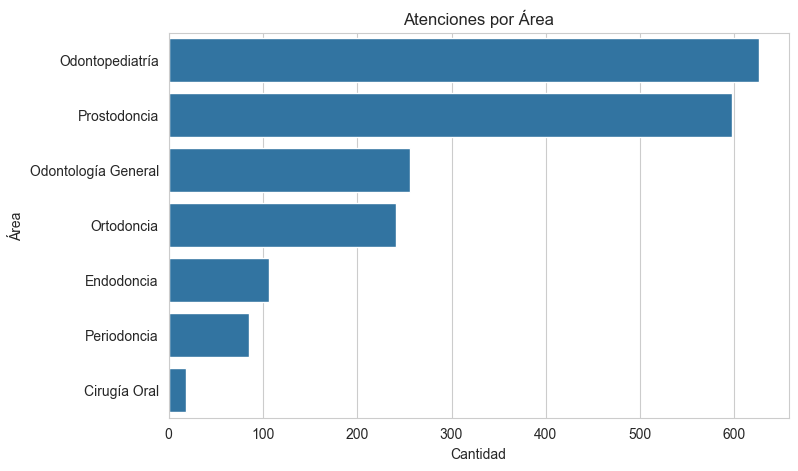

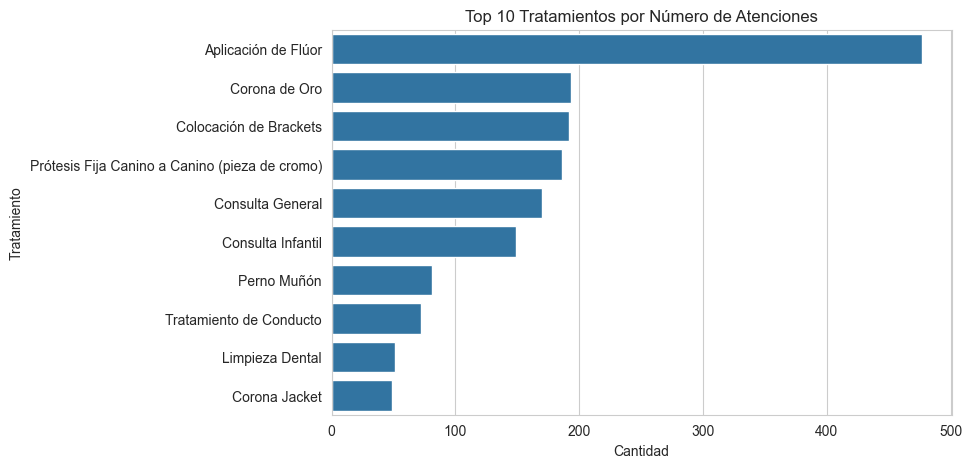

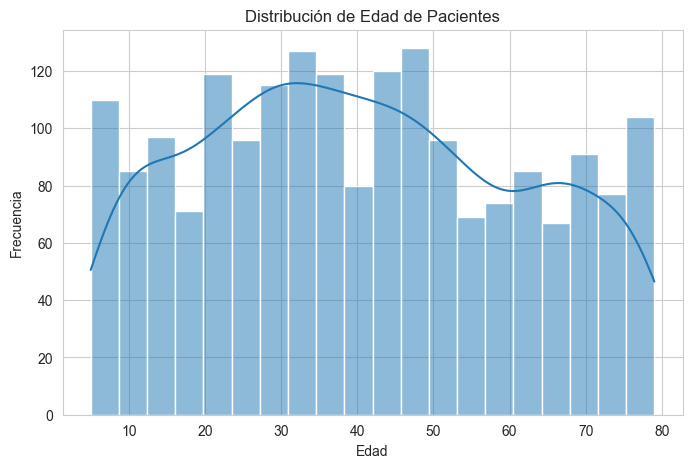

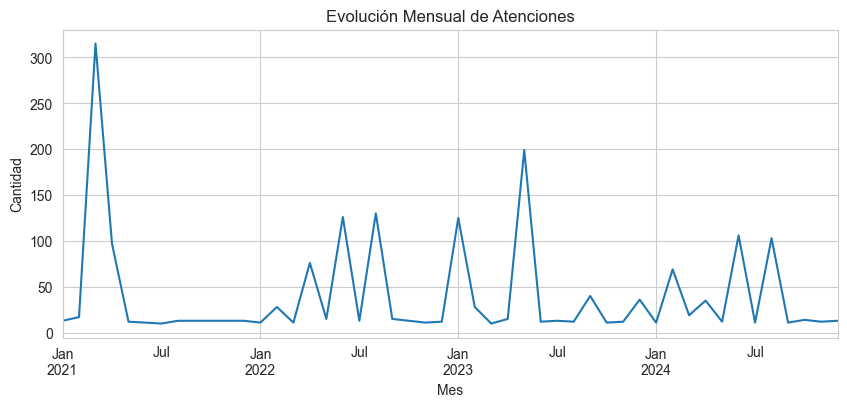

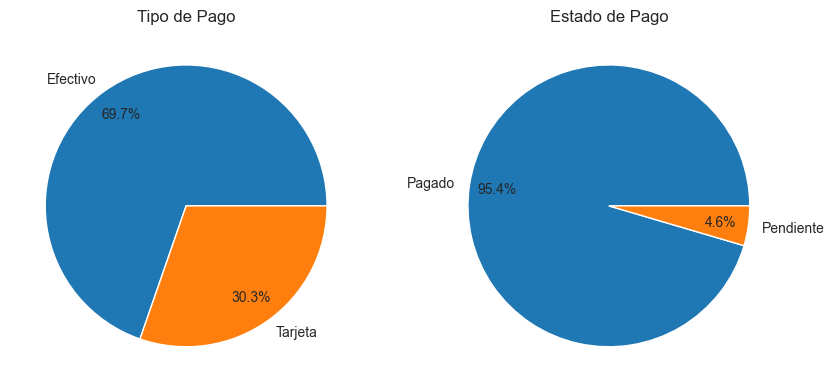

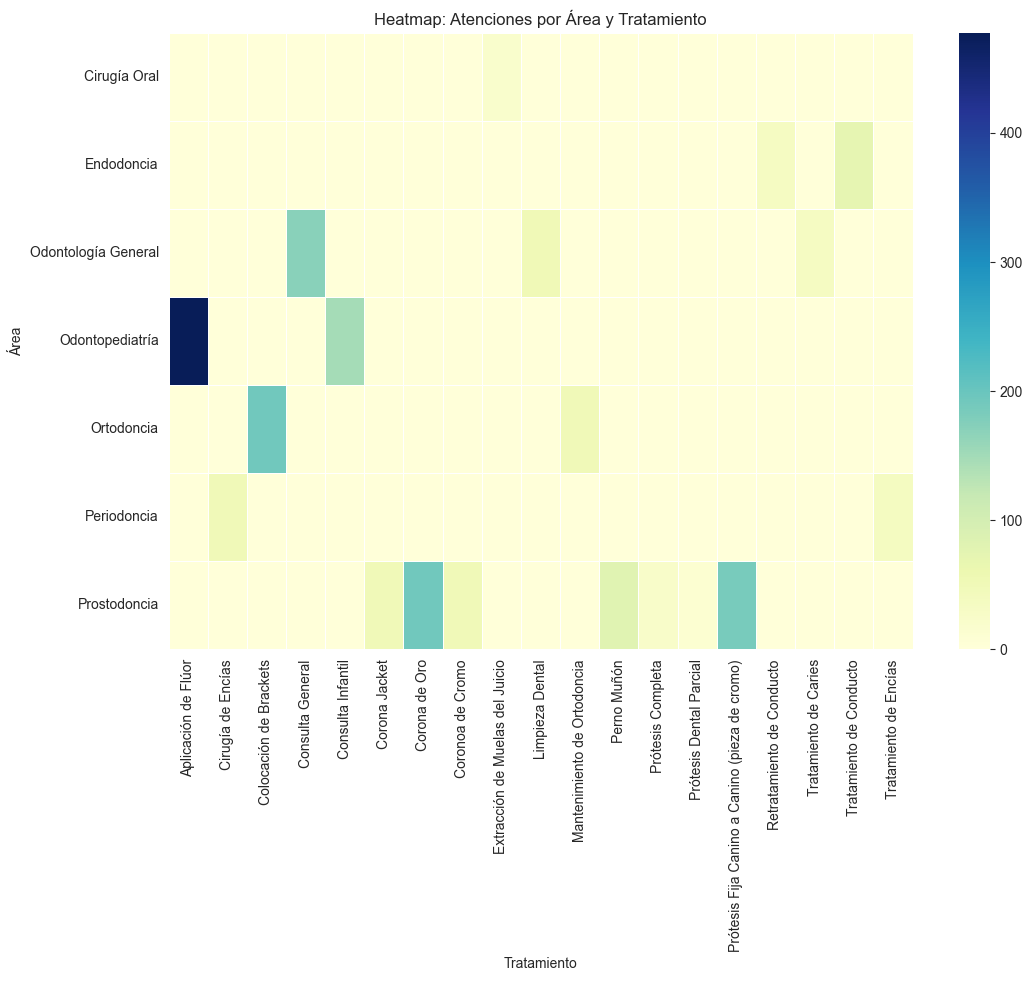

In [ ]:
# ==== Dashboard plots en Jupyter ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reconstruye tu merged (ajusta rutas si cambias de entorno)
areas = pd.read_csv(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final\areas_final.csv", header=None,
                    names=['area_id','area_name'])
pacientes = pd.read_csv(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final\pacientes_final.csv", header=None,
                        names=['patient_id','patient_name','age','gender','registration_date'])
tratamientos = pd.read_csv(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final\tratamientos_final.csv", header=None,
                           names=['treatment_id','treatment_name','area_id','price'])
atenciones = pd.read_csv(r"C:\Users\Perydox\Desktop\Proyecto_Grado - copia\data\Datos_final\atenciones_final.csv", header=None,
                         names=['attention_id','patient_id','treatment_id','attention_date','payment_type','status','extra'])
atenciones.drop(columns=['extra'], inplace=True)

merged = (
    atenciones
    .merge(pacientes, on='patient_id', how='left')
    .merge(tratamientos, on='treatment_id', how='left')
    .merge(areas, on='area_id', how='left')
)
merged['attention_date'] = pd.to_datetime(merged['attention_date'])
merged['year_month'] = merged['attention_date'].dt.to_period('M').dt.to_timestamp()

sns.set_style("whitegrid")

# 2. Atenciones por Área (horizontal bar)
fig1, ax1 = plt.subplots(figsize=(8,5))
order = merged['area_name'].value_counts().index
sns.countplot(data=merged, y='area_name', order=order, ax=ax1)
ax1.set_title("Atenciones por Área")
ax1.set_xlabel("Cantidad")
ax1.set_ylabel("Área")
# 3. Atenciones por Tratamiento (vertical bar, top 10)
top_treat = merged['treatment_name'].value_counts().nlargest(10)
fig2, ax2 = plt.subplots(figsize=(8,5))
sns.barplot(x=top_treat.values, y=top_treat.index, ax=ax2)
ax2.set_title("Top 10 Tratamientos por Número de Atenciones")
ax2.set_xlabel("Cantidad")
ax2.set_ylabel("Tratamiento")
# 4. Distribución de Edad (histograma)<
fig3, ax3 = plt.subplots(figsize=(8,5))
sns.histplot(merged['age'], bins=20, kde=True, ax=ax3)
ax3.set_title("Distribución de Edad de Pacientes")
ax3.set_xlabel("Edad")
ax3.set_ylabel("Frecuencia")
# 5. Evolución Mensual de Atenciones (línea)
monthly = merged.groupby('year_month').size().rename("count")
fig4, ax4 = plt.subplots(figsize=(10,4))
monthly.plot(ax=ax4)
ax4.set_title("Evolución Mensual de Atenciones")
ax4.set_xlabel("Mes")
ax4.set_ylabel("Cantidad")
# 6. Distribución Tipo de Pago y Estado (dos pies side-by-side)
fig5, (ax5a, ax5b) = plt.subplots(1, 2, figsize=(10,5))
merged['payment_type'].value_counts().plot.pie(autopct='%1.1f%%', pctdistance=0.8, ax=ax5a)
ax5a.set_ylabel('')
ax5a.set_title("Tipo de Pago")
merged['status'].value_counts().plot.pie(autopct='%1.1f%%', pctdistance=0.8, ax=ax5b)
ax5b.set_ylabel('')
ax5b.set_title("Estado de Pago")
# 7. Heatmap de Atenciones por Área y Tratamiento
pivot = pd.pivot_table(
    merged,
    index='area_name',
    columns='treatment_name',
    values='attention_id',
    aggfunc='count',
    fill_value=0
)
fig6, ax6 = plt.subplots(figsize=(12,8))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=.5, ax=ax6)
ax6.set_title("Heatmap: Atenciones por Área y Tratamiento")
ax6.set_xlabel("Tratamiento")
ax6.set_ylabel("Área")
# Mostrar todos
plt.show()
